Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7983 - loss: 0.6399 - val_accuracy: 0.9523 - val_loss: 0.1586
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9434 - loss: 0.1861 - val_accuracy: 0.9663 - val_loss: 0.1122
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9601 - loss: 0.1344 - val_accuracy: 0.9682 - val_loss: 0.1060
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9671 - loss: 0.1082 - val_accuracy: 0.9727 - val_loss: 0.0963
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9700 - loss: 0.0981 - val_accuracy: 0.9747 - val_loss: 0.0828
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9724 - loss: 0.0885 - val_accuracy: 0.9757 - val_loss: 0.0862
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9749 - loss: 0.0784 - val_accuracy: 0.9768 - val_loss: 0.0793
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9770 - loss: 0.0732 - 

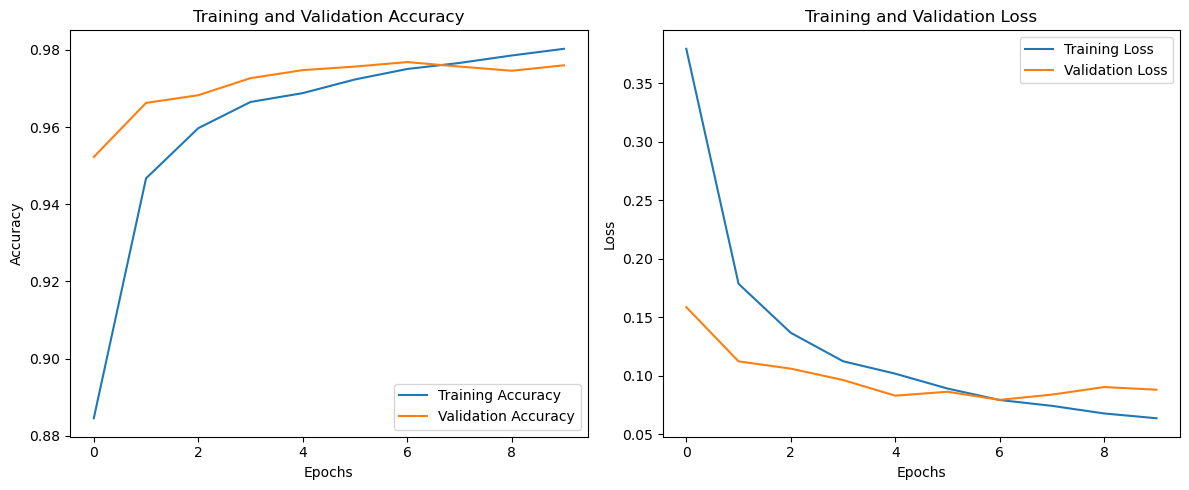

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Step 1: Load and Prepare the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to fit the model (28x28 images to 784 input features)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# One-hot encode the target variable
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Step 2: Build the Neural Network Model with Dropout
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # Input layer
    layers.Dropout(0.2),  # Dropout layer with 20% dropout
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dropout(0.2),  # Dropout layer with 20% dropout
    layers.Dense(10, activation='softmax')  # Output layer with softmax for multi-class
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical crossentropy for multi-class
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Step 6: Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
